

```
# Este projeto visa construir um modelo de detecção de sentimento usando SVM (Support Vector Machine) e vetorização TF-IDF (Term Frequency-Inverse Document Frequency).
```





```
# 1 . Baixar o dataset e organizar dentro de um Dataframe Pandas.
  2 . Pré-processar o texto, removendo stopwords, convertendo para minúsculas e realizando a lemmatização.
  3 . Vetorizar o texto usando TF-IDF.
  4 . Treinar um modelo de SVM para classificar os sentimentos.
  5 . Avaliar o desempenho do modelo usando métricas de avaliação.
  6 . Exibir uma matriz de confusão para visualizar os resultados.
  7 . Permitir testes sobre o dataset fornecido pela professora.
```



In [ ]:
# Instalações
!pip install nltk
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Imports
# Drive
from google.colab import drive
# pré-processamento de textos utilizando NLTK:
import pandas as pd
import re
import nltk
from nltk.stem.porter import *
# Spacy para lemmatização
import spacy

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

# Para plotar métricas
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.svm import LinearSVC

import joblib

In [ ]:
# Conectando ao google drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive
# Criando nosso objeto para manipulação de texto
lemmatizer = spacy.load("pt_core_news_sm")

Mounted at /content/drive
 avaliacao_da_disciplina_2022_1.xlsx   RePro.csv
 bitcoin_wallet_keywords.png	       repro-main.zip
'Colab Notebooks'		       review_repro_preprocessado.csv
 dataset_professora.csv		       reviews_ptbr.csv
 dataset_professora.gsheet	       tcc_analise_sentimento1.xlsx
 monero_wallet_keywords.png	       tw_pt.csv
 olist_preprocessado.csv


In [ ]:
# Lista de stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Como estamos interessados em analisar apenas os textos, vamos selecionar apenas as colunas 'review_text' e 'polarity':

df = pd.read_csv('/content/drive/MyDrive/RePro.csv')
review_df = df[['review_text', 'polarity']]
review_df

,review_text,polarity
0,"ESSE PRODUTO PODE ATÉ SER BOM, PORÉM, A AMERIC...","['NEGATIVO', 'POSITIVO']"
1,"Aparelho muito bom, confiável e com valor aqui...",['POSITIVO']
2,"As cores da impressão não são fiéis, O custo b...",['NEGATIVO']
3,"A história é muito boa, porém o autor ""enrolou...","['NEGATIVO', 'POSITIVO']"
4,"Entrega rápida, produto muito bom Amei. Pratic...",['POSITIVO']
...,...,...
9998,amei o produto. chegou no prazo e em perfeito ...,['POSITIVO']
9999,Ótima embalagem. Produto entregue no prazo. Re...,['POSITIVO']
10000,"ótimo produto, super recomendo .,Entrega bem r...",['POSITIVO']
10001,"Veio tudo certinho, dentro do prazo e o produt...",['POSITIVO']


In [ ]:
# lista de stopwords em português

stopwords_pt = nltk.corpus.stopwords.words('portuguese')

# Podem ser importantes
stopwords_pt.remove('não')
stopwords_pt.remove('nem')


In [ ]:
def limpa_texto(texto):
  '''(str) -> str
  Essa funcao recebe uma string, deixa tudo em minusculo, filtra apenas letras,
  retira stopwords, lemmatiza e retorna a string resultante.
  '''
  texto = texto.lower()

  texto = re.sub(r"[\W\d_]+", " ", texto)

  texto = [pal for pal in texto.split() if pal not in stopwords_pt]

  spc_texto = lemmatizer(" ".join(texto))
  tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_texto]

  return " ".join(tokens)

In [ ]:
# Removendo comentários que tinham apenas números ou símbolos
review_df = review_df[review_df['review_text'] != '']

In [ ]:
# Pré processando o texto de todas as reviews
review_df['review_text'] = review_df['review_text'].apply(limpa_texto)
# review_df = pd.read_csv('/content/drive/MyDrive/review_repro_preprocessado.csv')
review_df.head(5)

,review_text,polarity
0,produto poder bom porém americana não inspirar...,"['NEGATIVO', 'POSITIVO']"
1,aparelho bom confiável valor aquisitivo contar...,['POSITIVO']
2,cor impressãor não fiel custo benefício não va...,['NEGATIVO']
3,histór boa porém autor enrolar pouco meio livro,"['NEGATIVO', 'POSITIVO']"
4,entregar rápido produto bom amei praticidade,['POSITIVO']


In [ ]:
# Salvando o dataset pré-processado em csv para faciliar acesso posterior

# review_df.to_csv('review_repro_preprocessado.csv', index= False, columns= ['review_text', 'polarity'])



```
# Vetorização do texto usando TF-IDF
```



In [ ]:
# Carregamos a coluna de texto das reviews
texto = review_df['review_text']

In [ ]:
# Instanciando o TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Vetorizando
X_tfidf = tfidf_vect.fit_transform(texto)

print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 158667 stored elements and shape (10003, 5000)>
  Coords	Values
  (0, 3687)	0.12122314252267985
  (0, 3396)	0.08248235224496102
  (0, 584)	0.05174310652143208
  (0, 3455)	0.1800811496008052
  (0, 205)	0.17602685274320895
  (0, 2941)	0.17852231990510495
  (0, 2788)	0.22333577846290864
  (0, 1092)	0.16614669102948326
  (0, 224)	0.09990584733968215
  (0, 4371)	0.14185119787135922
  (0, 3419)	0.08588948871153784
  (0, 4327)	0.10719157196207453
  (0, 1650)	0.11389702431048807
  (0, 4507)	0.16896544617431689
  (0, 4991)	0.15120887512188314
  (0, 985)	0.08479070257510787
  (0, 1613)	0.1565780459741011
  (0, 1222)	0.13664641204446215
  (0, 1520)	0.18046957048056217
  (0, 824)	0.15120887512188314
  (0, 3666)	0.18709957829193355
  (0, 1710)	0.06352081468170233
  (0, 829)	0.0988804510277185
  (0, 3584)	0.11325536698960177
  (0, 46)	0.1624866593472887
  :	:
  (10001, 1363)	0.2662783553101184
  (10001, 1367)	0.3029072855830918
  (10001, 



```
# Treinar um modelo de SVM para classificar os sentimentos
```



In [ ]:
review_df.head(10)

,review_text,polarity
0,produto poder bom porém americana não inspirar...,"['NEGATIVO', 'POSITIVO']"
1,aparelho bom confiável valor aquisitivo contar...,['POSITIVO']
2,cor impressãor não fiel custo benefício não va...,['NEGATIVO']
3,histór boa porém autor enrolar pouco meio livro,"['NEGATIVO', 'POSITIVO']"
4,entregar rápido produto bom amei praticidade,['POSITIVO']
5,gostar bastante produto recomendo entregá ante...,['POSITIVO']
6,produto otimo so falta Carregador maquina pequeno,"['NEGATIVO', 'POSITIVO']"
7,recomendar aparelho motorola bom,['POSITIVO']
8,proteção antir queda não bom cair frente telo,['NEGATIVO']
9,,['NEUTRO']


In [ ]:
# Substituindo por numéricos para predição
review_df["polarity"] = review_df["polarity"].replace(["['NEGATIVO', 'POSITIVO']", "['POSITIVO']", "['NEGATIVO']", "['NEUTRO']"], [4, 1, 0, 2])

<ipython-input-14-2390835f6894>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  review_df["polarity"] = review_df["polarity"].replace(["['NEGATIVO', 'POSITIVO']", "['POSITIVO']", "['NEGATIVO']", "['NEUTRO']"], [4, 1, 0, 2])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, review_df['polarity'],
                                                        test_size=0.3, random_state=42)

In [ ]:
def mostra_metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as
  principais metricas.
  '''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))

In [ ]:
# O tempo de treinamento cresce de forma quadrática de acordo com a quantidade de registros

svm1 = LinearSVC()  # kernel linear é comum para problemas de texto; você pode testar outros kernels se necessário
svm1.fit(X_train.toarray(), y_train)

y_svm_pred = svm1.predict(X_test.toarray())
mostra_metricas(y_test, y_svm_pred)

Acurácia:  0.80973008997001

F1-Score: 0.8036642061353401


In [ ]:
# Salvar o modelo treinado
joblib.dump(svm1, "modelo_svm.pkl")

# Salvar o vetorizador usado no treinamento
joblib.dump(tfidf_vect, "vectorizer.pkl")

['vectorizer.pkl']

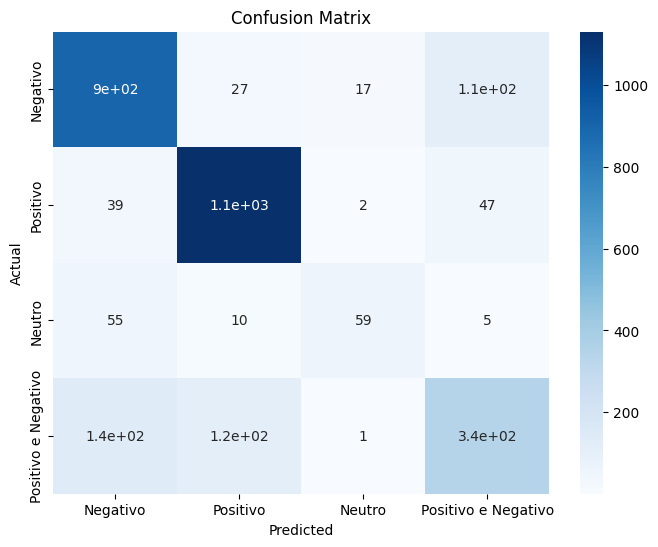

In [ ]:
cm = confusion_matrix(y_test, y_svm_pred)

columns = ['Negativo', 'Positivo', 'Neutro', 'Positivo e Negativo']
df_cm = pd.DataFrame(cm, index=columns, columns=columns)
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




```
# Agora vamos aplicar o método predict() do modelo sobre o dataset de exemplos da professora e depois construir um banco de dados para análise através de power BI
```



In [ ]:
# Carregando o dataset com os dados fornecidos pela professora
dataset_professora = pd.read_csv('/content/drive/MyDrive/dataset_professora.csv')
# Carregamos a coluna de texto das reviews
texto_professora = dataset_professora['feedback']

In [ ]:
# Carregar o modelo treinado e o vetorizador
modelo_svm = joblib.load("modelo_svm.pkl")  # Substitua pelo caminho correto do modelo
vectorizer = joblib.load("vectorizer.pkl")  # Substitua pelo caminho correto do vetor de treino

# Transformar os textos com o mesmo TfidfVectorizer
X_novo = vectorizer.transform(texto_professora)

# Fazer as previsões com o modelo treinado
dataset_professora["sentimento_predito"] = modelo_svm.predict(X_novo)

# Substituindo por numéricos para predição
dataset_professora["sentimento_predito"] = dataset_professora["sentimento_predito"].replace([4, 1, 0, 2], ["Negativo e Positivo", "Positivo", "Negativo", "Neutro"])

# Exibir as primeiras linhas para verificar
dataset_professora.head(10)



,semestre,curso,achou_util,feedback,sentimento,sentimento_predito
0,2021.2,Ciência da Computação,SIM,Essa transição de Ensino Médio para Universida...,NaN,Negativo e Positivo
1,2021.2,Ciência da Computação,SIM,Sinceramente achei bastante cansativo mentalme...,NaN,Negativo e Positivo
2,2021.2,Licenciatura em Computação (noturno),SIM,"Para ser bem sincero, ainda me sinto um pouco ...",NaN,Negativo e Positivo
3,2021.2,Ciência da Computação,SIM,O meu primeiro semestre no curso foi bem puxad...,NaN,Negativo e Positivo
4,2021.2,Ciência da Computação,SIM,Eu já venho de outro curso em outra universida...,NaN,Negativo
5,2021.2,Ciência da Computação,SIM,"Está sendo uma experiência excelente, apesar d...",NaN,Positivo
6,2021.2,Ciência da Computação,SIM,O primeiro semestre para mim foi uma experiênc...,NaN,Negativo e Positivo
7,2021.2,Ciência da Computação,SIM,"Por ter sido remoto, muito da experiência de s...",NaN,Negativo
8,2021.2,Licenciatura em Computação (noturno),SIM,"Gostei muito desse semestre, apesar de estar i...",NaN,Positivo
9,2021.2,Ciência da Computação,SIM,Apesar de não ter sido meu primeiro semestre c...,NaN,Negativo e Positivo


In [ ]:
# Salvando no drive o dataset da professora com predições para todos os registros

dataset_professora.to_csv('dataset_professora_predicoes.csv', index= False, columns= ['semestre', 'curso', 'achou_util', 'feedback', 'sentimento', 'sentimento_predito'])